# Pymaceuticals Inc.
---

### Analysis <br>

- 249 mouse has been part of the Clinical research.<br>
10 Drugs has been used in this research. <br>

##### Gender : <br>
Reference to the Pie chart gender Distribution, Male & Female ratio are 51 : 49 which is even.<br>

##### Out of 4 Drugs Regimen:<br>   
Capomulin & Ramicane are most popular Drugs and  has positive effects in supressing the Tumor compare to other Drugs.<br>
##### Capomulin treatment on Mouse l509 : <br>
Resistance to the medicine was high at the beginning of treatment up to 20 days and thereafter resistance decrease significantly along with decrease in Tumor Volume, <br> 
which shows that the Drug was effective in supressing the tumor.<br>

##### Regression Analysis:<br>
Correlation coefficient of 0.84 to 1, There is a positive Strong correlation between mouse weight and average tumor size in the mice treated with Capomulin. <br>
As the weight of the mouse increases, so does the average tumor volume.

 

In [1]:
# %matplotlib widget

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

df = pd.merge(study_results, mouse_metadata,how= 'left', on= 'Mouse ID')
# Display the data table for preview
df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [3]:

# Checking the number of mice.
unique_count = df['Mouse ID'].nunique()
print(unique_count)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = df[df.duplicated(subset=["Mouse ID", "Timepoint"])]

duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupg989 = df[df["Mouse ID"] == 'g989']
dupg989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df[df['Mouse ID'] != 'g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_cleaned_mice = cleaned_df['Mouse ID'].nunique()
unique_cleaned_mice

248

## Summary Statistics

In [8]:
stats = cleaned_df.set_index (['Drug Regimen'])
stats

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ketapril,f932,0,45.000000,0,Male,15,29
Ketapril,g107,0,45.000000,0,Female,2,29
Ketapril,a457,0,45.000000,0,Female,11,30
Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [9]:
Mean = stats.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
Median = stats.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
Var = stats.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
stdD = stats.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
stdE = stats.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()



In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({ 'Mean Tumor Volume' : Mean,
                                   'Median Tumor Volume': Median,
                                    'Tumor Volume Variance': Var,
                                    'Tumor Volume Std. Dev.':stdD,
                                    'Tumor Volume Std. Err.': stdE
                                   })

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_STATS = stats.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var', 'std','sem'])
summary_STATS



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
drug_regimen_timepoint = cleaned_df[['Drug Regimen', 'Timepoint']]
mice_per_drug = drug_regimen_timepoint ['Drug Regimen'].value_counts()
mice_per_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

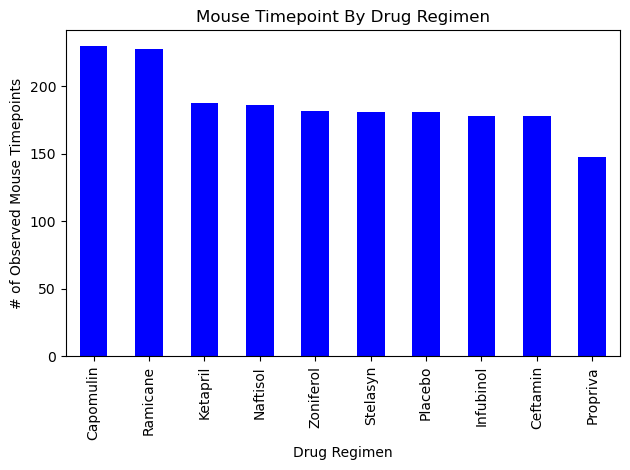

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_per_drug.plot(kind='bar', color='blue', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', title='Mouse Timepoint By Drug Regimen')
# plt.title('Mouse Timepoint By Drug Regimen')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Mouse Timepoint By Drug Regimen')

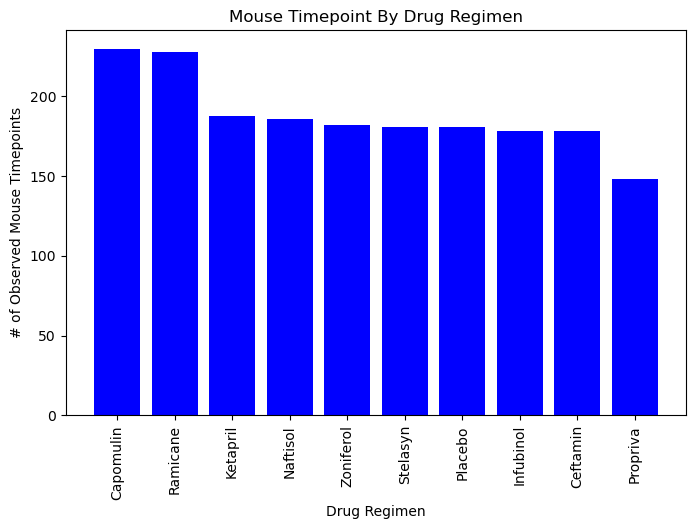

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = mice_per_drug.index.values
mice_count = mice_per_drug.values
plt.figure (figsize=(8, 5))
plt.xticks(rotation=90)
plt.bar(drug_regimen, mice_count, color = 'blue')
plt.xlabel('Drug Regimen')
plt.ylabel ('# of Observed Mouse Timepoints')
plt.title('Mouse Timepoint By Drug Regimen')
#plt.show()


<Axes: title={'center': ' Male VS Female Distribution'}, ylabel='Sex'>

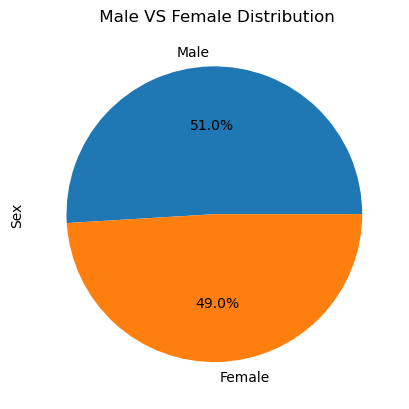

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = cleaned_df['Sex'].value_counts()
Sex1 = ["Male", "Female"]
gender.plot(kind='pie', autopct = '%1.1f%%', ylabel='Sex', title=' Male VS Female Distribution')
# plt.show()


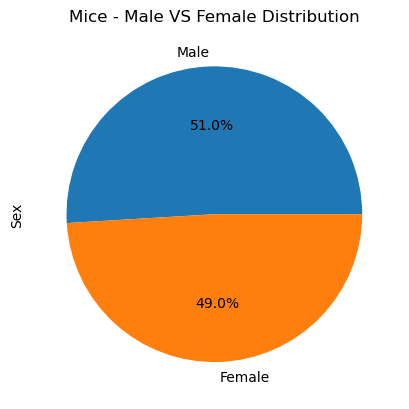

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
 
plt.pie(gender.values,autopct='%1.1f%%', labels=gender.index.values )
plt.ylabel('Sex')
plt.title('Mice - Male VS Female Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Tumor_Volume_byDrug = cleaned_df.loc [(cleaned_df['Drug Regimen']== 'Capomulin')| (cleaned_df['Drug Regimen']== 'Ramicane') | 
                                      (cleaned_df['Drug Regimen']== 'Infubinol')|(cleaned_df['Drug Regimen']== 'Ceftamin')]

Tumor_groupBy_mouse = Tumor_Volume_byDrug.groupby(['Mouse ID'])

Tumor_groupBy_mouse.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1098,j913,20,42.168341,0,Ramicane,Female,4,17
1102,a520,20,35.947745,0,Ramicane,Male,13,21
1104,d251,20,37.652091,1,Ramicane,Female,8,19
1105,s710,20,42.629963,1,Capomulin,Female,1,23


In [19]:

# Start by getting the last (greatest) timepoint for each mouse

for mouse in Tumor_groupBy_mouse:
    maxTp = Tumor_groupBy_mouse['Timepoint'].max()
greatestTimepoint = pd.DataFrame({'Timepoint': maxTp})

greatestTimepoint.head()


,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45


In [20]:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
TumorVolume_byTP = pd.merge(greatestTimepoint,cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
TumorVolume_byTP.reset_index()
TumorVolume_byTP.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16
99,z581,45,62.754451,3,Infubinol,Female,24,25


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']        
treatment


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [22]:

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_Data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# Add subset
# Determine outliers using upper and lower bounds
for drug in treatment:
    tumor_volume_DataF = TumorVolume_byTP.loc[TumorVolume_byTP['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volume_Data.append(tumor_volume_DataF)
    quartiles = tumor_volume_DataF.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lowerbound = round(lowerq - (1.5 * iqr), 6)
    upperbound = round(upperq + (1.5 * iqr), 6)

    outliers = tumor_volume_DataF.loc[(tumor_volume_DataF < lowerbound) | (tumor_volume_DataF > upperbound)]
    print(f"{drug}'s potential outliers {outliers} :  ")



Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64) :  
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64) :  
Infubinol's potential outliers 15    36.321346
Name: Tumor Volume (mm3), dtype: float64 :  
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64) :  


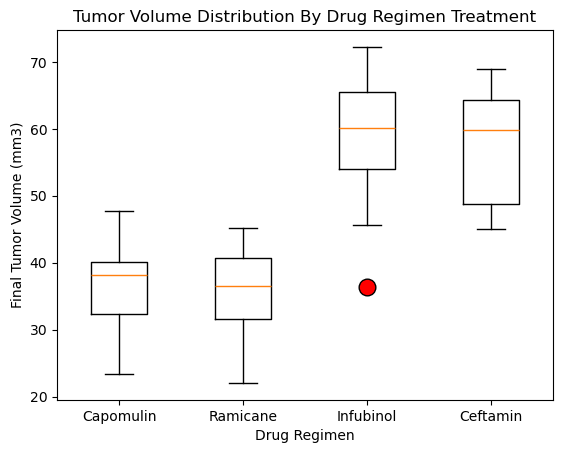

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_Data, flierprops={'markerfacecolor': 'r', 'marker': 'o', 'markersize': 12}, labels=treatment)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution By Drug Regimen Treatment')
plt.show()

## Line and Scatter Plots

In [24]:
capomulin_mouse = cleaned_df.loc[cleaned_df['Mouse ID'] == 'l509']
capomulin_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


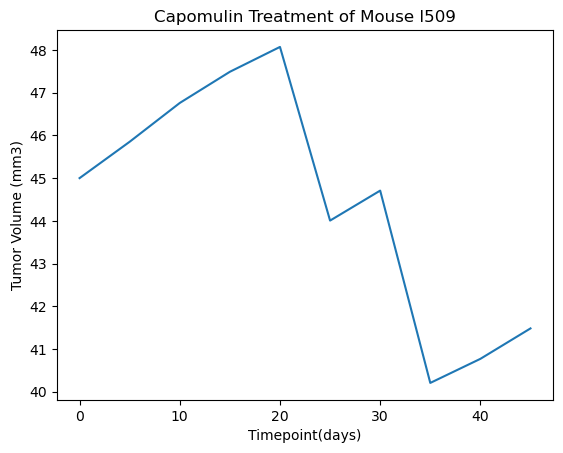

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(capomulin_mouse['Timepoint'],capomulin_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [26]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


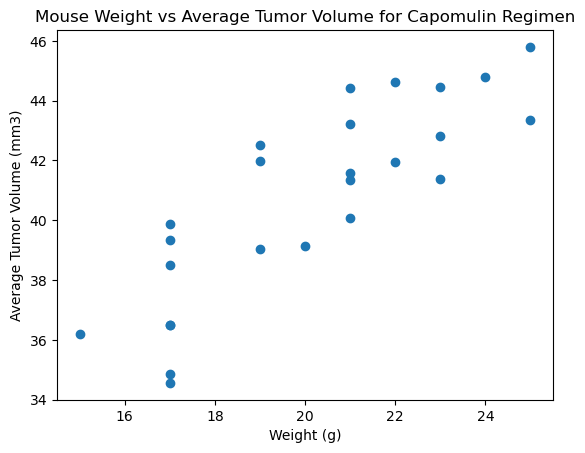

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin'] # filter for Capomulin

# Group by 'Mouse ID' and calculate the mean for 'Weight (g)' and 'Tumor Volume (mm3)'
average_data = capomulin_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean().reset_index()

plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')
plt.show()



## Correlation and Regression

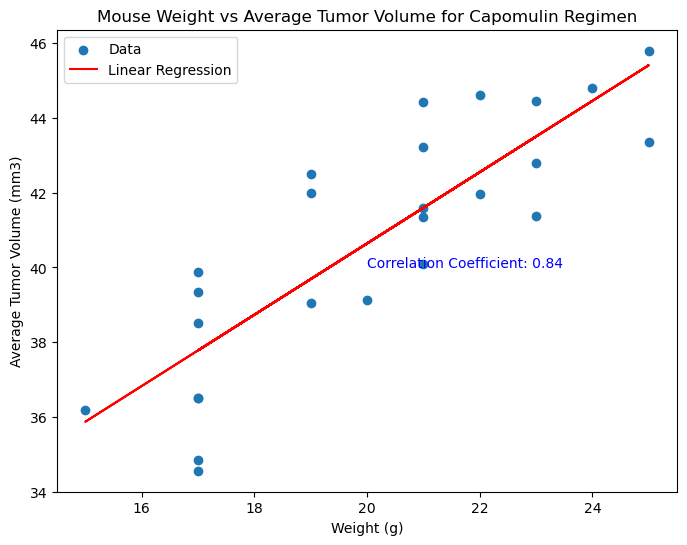

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = average_data['Weight (g)'].corr(average_data['Tumor Volume (mm3)'])
# Fit linear regression model
slope, intercept, r_value, p_value, std_err = linregress(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Plot the scatter plot
plt.figure(figsize= (8,6))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], label='Data')

# linear regression line
plt.plot(average_data['Weight (g)'], slope * average_data['Weight (g)'] + intercept, color='red', label='Linear Regression')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')

# Display correlation coefficient on the plot
plt.text(20, 40, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=10, color='blue')

plt.legend()
plt.show()